In [111]:
# Data Science Job Salaries Dataset contains 11 columns, each are:

#  work_year          : The year the salary was paid.
#  experience_level   : The experience level in the job during the year
# employment_type     : The type of employment for the role
#  job_title          : The role worked in during the year.
#  salary             : The total gross salary amount paid.
#  salary_currency    : The currency of the salary paid as an ISO 4217 currency code.
#  salaryinusd        : The salary in USD
#  employee_residence : Employee's primary country of residence in during the work year as an ISO 3166 country code.
#  remote_ratio       : The overall amount of work done remotely
#  company_location   : The country of the employer's main office or contracting branch
#  company_size       : The median number of people that worked for the company during the year

#### Objective: The main aim of this project is to investigate the factors influencing the salaries of Data science

## IMPOTING THE LIBRARIES

In [112]:
# importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## DATA PREPROCESSING

In [113]:
# Read the Data
ds_salaries = pd.read_csv('E:/Great Learning Offine courses/kaggle datasets/Data Science Salaray 2023/ds_salaries.csv')

In [114]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [115]:
ds_salaries.shape       # check number of columns and rows

(3755, 11)

In [116]:
ds_salaries.columns                   # check the column names

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [117]:
ds_salaries.isnull().sum()             # checking null values.

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [118]:
ds_salaries.dtypes    # check for data types

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

**Exploratory Data Analysis (EDA):**

In [119]:
ds_salaries['work_year'].count()      # count of total rows

3755

In [120]:
#  Rename categorical column values for better understanding

ds_salaries['experience_level'] = ds_salaries['experience_level'].replace({'SE':'Senior', 'MI':'Mid-level', 'EN':'Entry-level','EX':'Executive-level'})
ds_salaries['employment_type'] = ds_salaries['employment_type'].replace({'FT':'Full-time', 'CT':'Contractual','PT':'Part-time', 'FL':'Freelancer'})
ds_salaries['remote_ratio'] = ds_salaries['remote_ratio'].replace({100: 'Full-Remote', 0: 'No Remote-work', 50:'Partial Remote-work'})


In [121]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,Senior,Full-time,Principal Data Scientist,80000,EUR,85847,ES,Full-Remote,ES,L
1,2023,Mid-level,Contractual,ML Engineer,30000,USD,30000,US,Full-Remote,US,S
2,2023,Mid-level,Contractual,ML Engineer,25500,USD,25500,US,Full-Remote,US,S
3,2023,Senior,Full-time,Data Scientist,175000,USD,175000,CA,Full-Remote,CA,M
4,2023,Senior,Full-time,Data Scientist,120000,USD,120000,CA,Full-Remote,CA,M


In [122]:
len(ds_salaries['job_title'].unique())     # Unique  job title

93

In [123]:
# Looking at the 5 point summary of Numeric dataset

ds_salaries.describe().transpose()                 # describe() method returns description of the data in the DataFrame.

,count,mean,std,min,25%,50%,75%,max
work_year,3755.0,2022.373635,0.691448,2020.0,2022.0,2022.0,2023.0,2023.0
salary,3755.0,190695.571771,671676.500508,6000.0,100000.0,138000.0,180000.0,30400000.0
salary_in_usd,3755.0,137570.389880,63055.625278,5132.0,95000.0,135000.0,175000.0,450000.0


In [125]:
ds_salaries[ds_salaries['work_year']==2023]['job_title'].value_counts()             # check  count of job titles on 2023

job_title
Data Engineer                499
Data Scientist               370
Data Analyst                 307
Machine Learning Engineer    158
Research Scientist            55
                            ... 
BI Data Analyst                1
Financial Data Analyst         1
BI Data Engineer               1
Data DevOps Engineer           1
Principal Data Scientist       1
Name: count, Length: 65, dtype: int64

# Q1. Top 10 jobs titles in 2023

In [126]:
# Top 10 jobs titles in 2023
# The nlargest() method returns a specified number of rows
# Reset the index back to 0, 1, 2

jobs = ds_salaries[ds_salaries['work_year']==2023]['job_title'].value_counts().nlargest(11).reset_index()
jobs

,job_title,count
0,Data Engineer,499
1,Data Scientist,370
2,Data Analyst,307
3,Machine Learning Engineer,158
4,Research Scientist,55
5,Data Architect,52
6,Analytics Engineer,46
7,Applied Scientist,40
8,Research Engineer,32
9,Data Manager,22


## **Data Visualization**

The Top 10 Job titles in 2023 in terms of Count of Employees

[Text(0, 0, '499'),
 Text(0, 0, '370'),
 Text(0, 0, '307'),
 Text(0, 0, '158'),
 Text(0, 0, '55'),
 Text(0, 0, '52'),
 Text(0, 0, '46'),
 Text(0, 0, '40'),
 Text(0, 0, '32'),
 Text(0, 0, '22'),
 Text(0, 0, '22')]

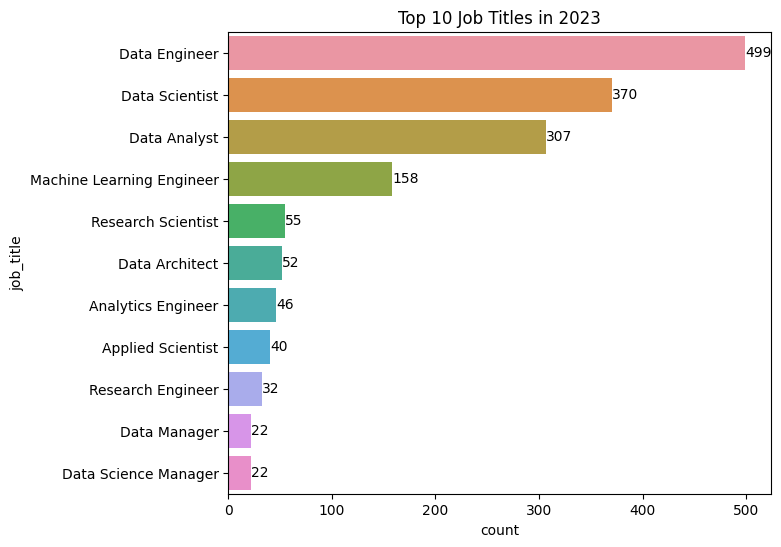

In [127]:
fig, ax = plt.subplots(figsize=(7,6))
plt.title('Top 10 Job Titles in 2023')              # title name
sns.barplot(y=jobs['job_title'], x=jobs['count'])    # bar plot graph
ax.bar_label(ax.containers[0])

The top job titles in 2023 were "data engineer", "data scientist", and "data analyst", indicating the continued demand for professionals in these roles.

# Q2. The Top 10 Job titles in terms of Average salary_in_USD of Employees

In [128]:
# top 10 jobs based on Average salary in USD

average_salary = ds_salaries.groupby('job_title')['salary_in_usd'].mean().reset_index()
top_10_jobs = average_salary.nlargest(10, 'salary_in_usd')
top_10_jobs

,job_title,salary_in_usd
46,Data Science Tech Lead,375000.000000
19,Cloud Data Architect,250000.000000
35,Data Lead,212500.000000
28,Data Analytics Lead,211254.500000
84,Principal Data Scientist,198171.125000
53,Director of Data Science,195140.727273
83,Principal Data Engineer,192500.000000
75,Machine Learning Software Engineer,192420.000000
45,Data Science Manager,191278.775862
8,Applied Scientist,190264.482759


[Text(0, 0, '375000'),
 Text(0, 0, '250000'),
 Text(0, 0, '212500'),
 Text(0, 0, '211254'),
 Text(0, 0, '198171'),
 Text(0, 0, '195141'),
 Text(0, 0, '192500'),
 Text(0, 0, '192420'),
 Text(0, 0, '191279'),
 Text(0, 0, '190264')]

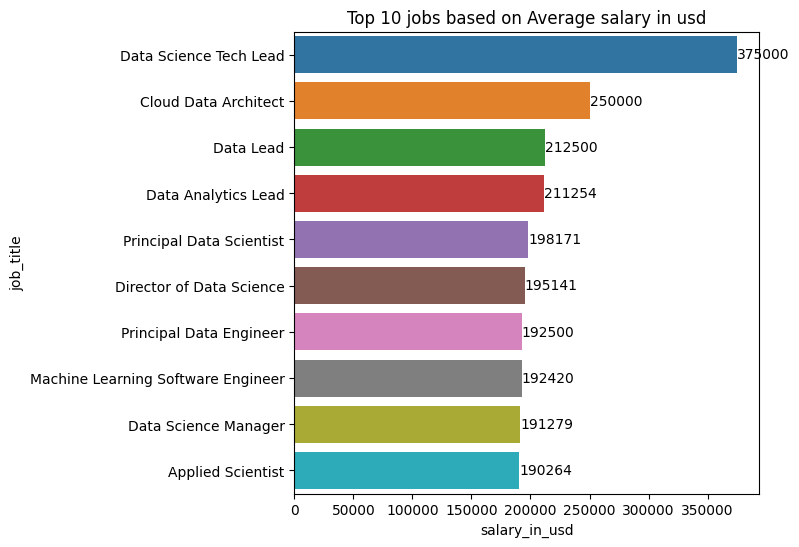

In [129]:
fig, ax = plt.subplots(figsize=(6,6))
plt.title('Top 10 jobs based on Average salary in usd')
sns.barplot(x=top_10_jobs['salary_in_usd'],y=top_10_jobs['job_title'])
ax.bar_label(ax.containers[0])

In terms of average salaries across different job titles, "Data Science Tech Lead" is the highest paying job role in dataset followed by "Cloud data architect"

# Q3. Number of employees based on Experience level

In [130]:
level_counts = ds_salaries['experience_level'].value_counts()
level_counts

experience_level
Senior             2516
Mid-level           805
Entry-level         320
Executive-level     114
Name: count, dtype: int64

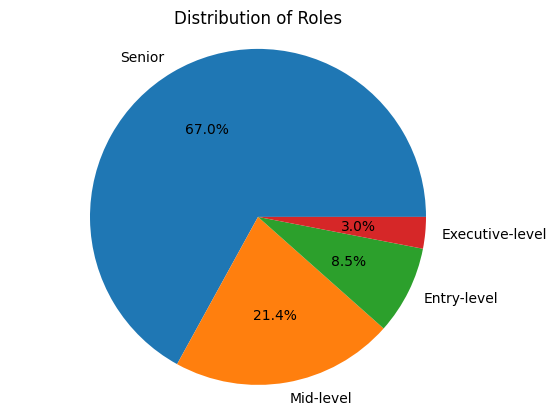

In [131]:
# Percentage is based on experience levels.

plt.pie(level_counts.values, labels=level_counts.index,autopct='%1.1f%%')
plt.title('Distribution of Roles')
plt.axis('equal')
plt.show()

Senior-level positions had the highest percentage among data-driven professionals, highlighting the importance of experience in the field.

# Q4. No. of Employees based on Experience level and work year

<Axes: xlabel='work_year', ylabel='count'>

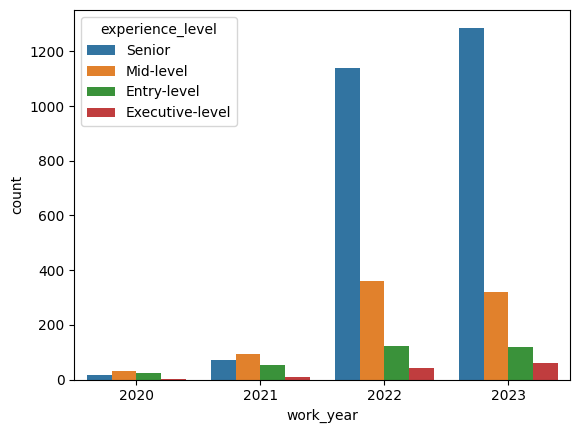

In [135]:
# work year count based on experience level.

sns.countplot(x='work_year',data=ds_salaries,hue='experience_level')

Most of the employees are "Senior Level" in the year of 2022 and 2023

# Q5. Remote Job Ratio by Work Year

<Axes: xlabel='work_year', ylabel='count'>

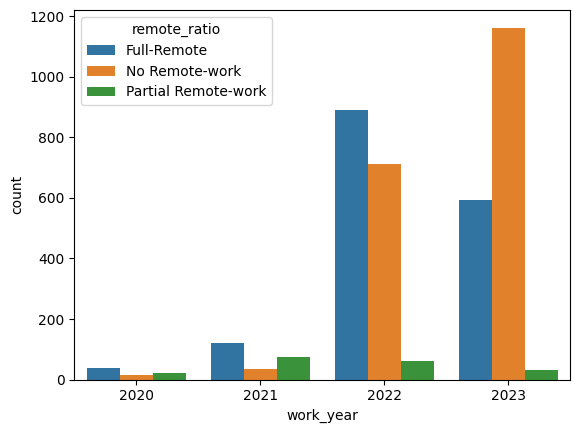

In [136]:
# work year count based on remote ratio
sns.countplot(x='work_year',data=ds_salaries,hue='remote_ratio')

# Q6. Salaries based on Company Size

Text(0.5, 1.0, 'salaries based on company size')

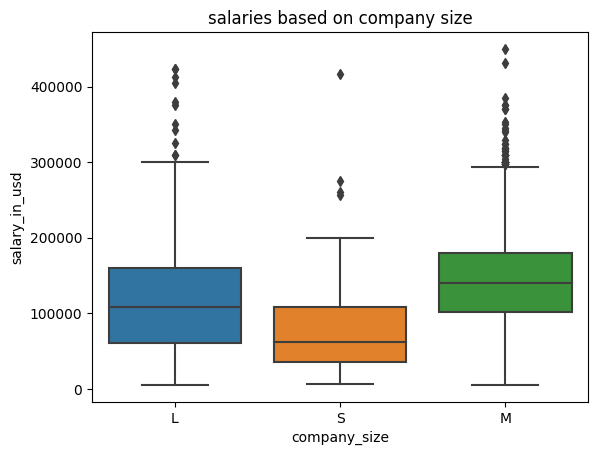

In [172]:
sns.boxplot(x="company_size",y="salary_in_usd",data=ds_salaries)
plt.title("salaries based on company size")

In terms of salary, the order of preference from medium-sized to large and then small

# Q7. Salaries based on work year per Employment Type

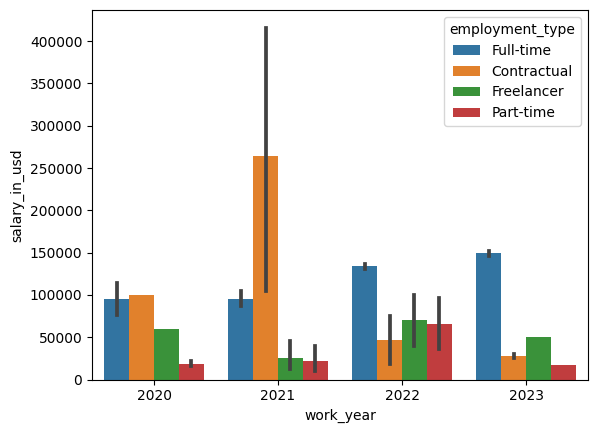

In [165]:
sns.barplot(data = ds_salaries, x='work_year',y='salary_in_usd',hue ='employment_type')
plt.show()

Full-time employees had higher salaries compared to freelancers and contract positions, indicating the value placed on job stability and benefits.

# Q8. Salary Trend over the Year

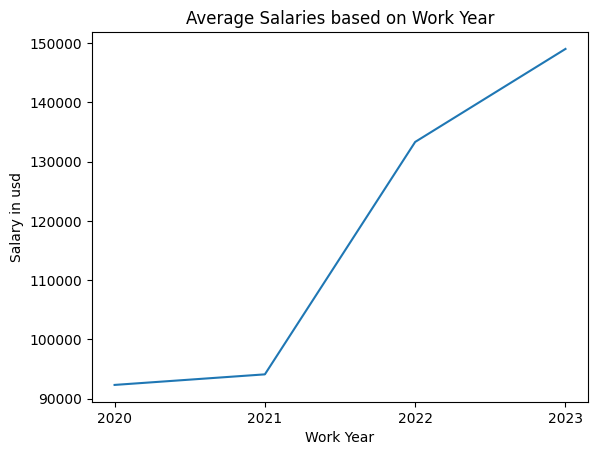

In [148]:
# Filtering and grouping
year_based_salary = ds_salaries['salary_in_usd'].groupby(ds_salaries['work_year']).mean()
# Setting the labels
plt.title("Average Salaries based on Work Year")
plt.xlabel('Work Year')
plt.ylabel('Salary in usd')
# Drawing the line plot
sns.lineplot(x=['2020', '2021', '2022','2023'], y=year_based_salary)
plt.show()

Average salaries for data-driven jobs showed a consistent increase over the years. From 2021 to 2022, the salaries are increased very rapidly,it reflecting the growing demand for skilled professionals in this field.